**Macroeconomics III - Solow Model Simulation**

OOP approach to incorporate different models and parameters in one single method (run_simulation function).

# Code

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Classes for different Models

### Basic Solow Model

In [2]:
# create a class for the basic Solow Model
class BS:    
    r"""
    Implements the basic Solow growth model

     """
    def __init__(self, n=0.02,      # population growth rate
                       s=0.2,       # physical capital savings rate
                       delta=0.05,  # depreciation rate
                       alpha=1/3,   # share of labor / elasticity of capital
                       B=1,         # total factor productivity
                       L=1.0,       # initial labor
                       K=1.0,        # initial capital stock
                       A=0):        # not needed, but included for compatibility with the simulation loop

        if alpha <= 0 or alpha >= 1:
            raise ValueError("Your parameters violate assumptions of the model.") 

        self.n, self.s, self.delta, self.alpha, self.B, self.L, self.K, self.A = n, s, delta, alpha, B, L, K, A
        
        # other initial values based on initial parameters
        self.Y = self.B*self.K**(self.alpha)*self.L**(1-self.alpha)
        self.y = self.Y / self.L
        self.k = self.K / self.L
        self.c = (1-self.s)*self.y

    def update(self):                                   # Formulas of the model
        self.Y_old = self.Y                             # save old value for growth rate calculation
        self.y_old = self.y                             # save old value for growth rate calculation
        self.K = self.s*self.Y + (1-self.delta)*self.K  # Update rule physical capital
        self.L = (1+self.n)*self.L                      # Labour growth
        self.k = self.K/self.L                          # Capital per worker
        self.Y = self.B*self.K**(self.alpha)*self.L**(1-self.alpha) # Output
        self.y = self.Y/self.L                          # Output per worker
        self.c = (1-self.s)*self.y                      # Consumption per worker
        self.g_Y = np.log(self.Y) - np.log(self.Y_old)  # Growth rate
        self.g_y = np.log(self.y) - np.log(self.y_old)  # Growth rate per worker

        return self.K, self.L, self.k, self.Y, self.y, self.c, self.g_Y, self.g_y

### General Solow Model

In [3]:
# create a class for the general Solow Model
class GS:    
    r"""
    Implements the general Solow growth model

     """
    def __init__(self, n=0.02,      # population growth rate
                       s=0.2,       # physical capital savings rate
                       delta=0.05,  # depreciation rate
                       alpha=1/3,   # share of labor / elasticity of capital
                       g=0.02,      # technology growth rate
                       A=1.0,       # initial technology
                       L=1.0,       # initial labor
                       K=1.0):      # initial capital stock

        if alpha <= 0 or alpha >= 1:
            raise ValueError("Your parameters violate assumptions of the model.") 

        self.n, self.s, self.delta, self.alpha, self.g, self.A, self.L, self.K = n, s, delta, alpha, g, A, L, K
        
        # other initial values based on initial parameters
        self.Y = self.K**(self.alpha)*(self.A*self.L)**(1-self.alpha)
        self.y = self.Y / self.L
        self.k = self.K / self.L
        self.c = (1-self.s)*self.y

    def update(self):                                   # formulas of the model
        self.Y_old = self.Y                             # save old value for growth rate calculation
        self.y_old = self.y                             # save old value for growth rate calculation
        self.K = self.s*self.Y + (1-self.delta)*self.K  # Update rule physical capital
        self.L = (1+self.n)*self.L                      # Labour growth
        self.k = self.K/self.L                          # Capital per worker
        self.A = (1+self.g)*self.A                      # Update rule Technology (exogenous)
        self.Y = self.K**(self.alpha)*(self.A*self.L)**(1-self.alpha) # Output
        self.y = self.Y/self.L                          # Output per worker
        self.c = (1-self.s)*self.y                      # Consumption per worker
        self.g_Y = np.log(self.Y) - np.log(self.Y_old)  # Growth rate
        self.g_y = np.log(self.y) - np.log(self.y_old)  # Growth rate per worker

        return self.K, self.L, self.k, self.A, self.Y, self.y, self.c, self.g_y

### Mankiw, Romer and Weil (1992) Model with human capital

In [4]:
# create a class for Solow Model with Human capital
class HC:
    r"""
    Implements the semi endogenous Solow growth model

     """
    def __init__(self, n=0.02,  # population growth rate
                       s=0.2,  # physical capital savings rate
                       s_h=0.2,  # human capital savings rate
                       delta=0.05,   # depreciation rate
                       alpha=1/3,   # share of labor / elasticity of capital
                       phi=1/3,  # Scale effect
                       g=0.02,  # technology growth rate
                       A=1.0,  # initial technology
                       L=1.0,  # initial labor
                       K=1.0, # initial capital stock
                       H=1.0): # initial human capital stock

        if alpha + phi > 1 or alpha <= 0 or phi <= 0 or alpha >= 1 or phi >= 1:
            raise ValueError("Your parameters violate assumptions of the model.") 

        self.n, self.s, self.s_h, self.delta, self.alpha, self.phi, self.g, self.A, self.L, self.K, self.H = n, s, s_h, delta, alpha, phi, g, A, L, K, H
        
        # other initial values based on initial parameters
        self.Y = self.K**(self.alpha)*self.H**(self.phi)*(self.A*self.L)**(1-self.alpha-self.phi)
        self.y = self.Y / self.L
        self.k = self.K / self.L
        self.c = (1-self.s)*self.y

    def update(self):                                   # formulas of the model
        self.Y_old = self.Y                             # save old value for growth rate calculation
        self.y_old = self.y                             # save old value for growth rate calculation
        self.K = self.s*self.Y + (1-self.delta)*self.K  # Update rule physical capital
        self.H = self.s_h*self.Y + (1-self.delta)*self.H # Update rule human capital
        self.L = (1+self.n)*self.L                      # Labour growth
        self.k = self.K/self.L                          # Capital per worker
        self.A = (1+self.g)*self.A                      # Update rule Technology (exogenous)
        self.Y = self.K**(self.alpha)*self.H**(self.phi)*(self.A*self.L)**(1-self.alpha-self.phi) # Output
        self.y = self.Y/self.L                          # Output per worker
        self.c = (1-self.s-self.s_h)*self.y             # Consumption
        self.g_Y = np.log(self.Y) - np.log(self.Y_old)  # Growth rate
        self.g_y = np.log(self.y) - np.log(self.y_old)  # Growth rate per worker

        return self.K, self.L, self.k, self.A, self.Y, self.y, self.c, self.g_y

### Semi Endogenous Growth Model

In [5]:
# create a class for Semi-Endogenous Solow Model
class SE:
    r"""
    Implements the semi endogenous Solow growth model

     """
    def __init__(self, n=0.02,      # population growth rate
                       s=0.2,       # savings rate
                       delta=0.05,  # depreciation rate
                       alpha=1/3,   # share of labor / elasticity of capital
                       phi=5/6,     # Scale effect
                       A=1.0,       # initial technology
                       L=1.0,       # initial labor
                       K=1.0):      # initial capital stock

        if alpha <= 0 or phi <= 0 or alpha >= 1 or phi >= 1:
            raise ValueError("Your parameters violate assumptions of the model.") 

        self.n, self.s, self.delta, self.alpha, self.phi, self.A, self.L, self.K = n, s, delta, alpha, phi, A, L, K
        
        # other initial values based on initial parameters
        self.Y = self.K**(self.alpha + self.phi*(1-self.alpha))*self.L**(1-self.alpha)
        self.y = self.Y / self.L
        self.k = self.K / self.L
        self.c = (1-self.s)*self.y

    def update(self):                                   # formulas of the model
        self.Y_old = self.Y                             # save old value for growth rate calculation
        self.y_old = self.y                             # save old value for growth rate calculation
        self.K = self.s*self.Y + (1-self.delta)*self.K  # Update rule
        self.L = (1+self.n)*self.L                      # Labour growth
        self.k = self.K/self.L                          # Capital per worker
        self.A = self.K**self.phi                       # Technology (semi-endogenous)
        self.Y = self.K**(self.alpha + self.phi*(1-self.alpha))*self.L**(1-self.alpha) # Output
        self.y = self.Y/self.L                          # Output per worker
        self.c = (1-self.s)*self.y                      # Consumption per worker
        self.g_Y = np.log(self.Y) - np.log(self.Y_old)  # Growth rate
        self.g_y = np.log(self.y) - np.log(self.y_old)  # Growth rate per worker

        return self.K, self.L, self.k, self.A, self.Y, self.y, self.c, self.g_y

### AK-Model

In [6]:
class AK:
    r"""
    Implements the AK (truly) endogenous growth model

     """
    def __init__(self, n=0,  # population growth rate must equal 0
                       s=0.2,  # savings rate
                       delta=0.05,   # depreciation rate
                       alpha=1/3,   # share of labor / elasticity of capital
                       phi=1,  # Scale effect must equal 1
                       # initial technology is not needed
                       L=1.0,  # initial labor
                       K=1.0): # initial capital stock

        if n != 0 or alpha <= 0 or alpha >= 1 or phi != 1:
            raise ValueError("Your parameters violate assumptions of the model.") 

        self.n, self.s, self.delta, self.alpha, self.phi, self.L, self.K = n, s, delta, alpha, phi, L, K
        
        # other initial values based on initial parameters
        self.A = self.L**(1-self.alpha)
        self.Y = self.A*self.K
        self.y = self.Y / self.L
        self.k = self.K / self.L
        self.c = (1-self.s)*self.y

    def update(self):                                # formulas of the model
        self.Y_old = self.Y                             # save old value for growth rate calculation
        self.y_old = self.y                             # save old value for growth rate calculation
        self.K = self.s*self.Y + (1-self.delta)*self.K  # Update rule
        self.L = (1+self.n)*self.L                      # Labour growth
        self.k = self.K/self.L                          # Capital per worker
        self.A = self.L**(1-self.alpha)                 # Technology (semi-endogenous)
        self.Y = self.K**(self.alpha + self.phi*(1-self.alpha))*self.L**(1-self.alpha) # Output
        self.y = self.Y/self.L                          # Output per worker
        self.c = (1-self.s)*self.y                      # Consumption per worker
        self.g_Y = np.log(self.Y) - np.log(self.Y_old)    # Growth rate approximation
        self.g_y = np.log(self.y) - np.log(self.y_old)    # Growth rate per worker

        return self.K, self.L, self.k, self.A, self.Y, self.y, self.c, self.g_y

### R&D Model (with scale effect)

In [7]:
# create a class for R&D model (semi-endogenous)
class RD_S:
    r"""
    Implements the semi endogenous R&D model

     """
    def __init__(self, n=0.04,      # population growth rate
                       s=0.2,       # savings rate
                       s_R=0.04,    # R&D share of labor force
                       delta=0.1,   # depreciation rate
                       alpha=1/3,   # share of labor / elasticity of capital
                       phi=0.4,       # Scale effect
                       rho=1,       # technology production
                       lambda_R=0.8,# stepping on toes
                       A=1.0,       # initial technology
                       L=1.0,       # initial labor final goods sector
                       K=1.0):      # initial capital stock

        if alpha <= 0 or phi <= 0 or alpha >= 1:
            raise ValueError("Your parameters violate assumptions of the model.") 

        self.n, self.s,self.s_R, self.delta, self.alpha, self.phi, self.rho, self.lambda_R, self.A, self.L, self.K = n, s, s_R, delta, alpha, phi, rho, lambda_R, A, L, K
        
        # other initial values based on initial parameters
        self.Y = self.K**(self.alpha)*(self.A*self.L)**(1-self.alpha)
        self.L_A = self.L*self.s_R
        self.y = self.Y / self.L
        self.k = self.K / self.L
        self.c = (1-self.s)*self.y

    def update(self):                                   # formulas of the model
        self.Y_old = self.Y                             # save old value for growth rate calculation
        self.y_old = self.y                             # save old value for growth rate calculation
        self.K = self.s*self.Y + (1-self.delta)*self.K  # Update rule
        self.L = (1+self.n)*self.L                      # Labour growth
        self.L_A = self.L*self.s_R                      # Labour force in R&D sector
        self.k = self.K/self.L                          # Capital per worker
        self.A = self.rho*self.A**self.phi*self.L_A**self.lambda_R + self.A # Technology (semi-endogenous) with stepping on toes and fishing out effects
        self.Y = self.K**(self.alpha)*(self.A*(self.L*(1-self.s_R)))**(1-self.alpha) # Output
        self.y = self.Y/self.L                          # Output per worker
        self.c = (1-self.s)*self.y                      # Consumption
        self.g_Y = np.log(self.Y) - np.log(self.Y_old)  # Growth rate
        self.g_y = np.log(self.y) - np.log(self.y_old)  # Growth rate per worker

        return self.K, self.L, self.k, self.A, self.Y, self.y, self.c, self.g_y, self.g_Y

### R&D Model (without scale effect)

In [8]:
# create a class for R&D model (without scale effect)
class RD:
    r"""
    Implements the endogenous R&D model

     """
    def __init__(self, n=0,         # population growth rate
                       s=0.2,       # savings rate
                       s_R=0.2,     # R&D share of labor force
                       delta=0.05,  # depreciation rate
                       alpha=1/3,   # share of labor / elasticity of capital
                       phi=1,       # Endogenous parameter
                       rho=0.02,    # technology production
                       lambda_R=0.1,# stepping on toes
                       A=1.0,       # initial technology
                       L=1.0,       # initial labor final goods sector
                       K=1.0):      # initial capital stock

        if alpha <= 0 or phi != 1 or alpha >= 1:
            raise ValueError("Your parameters violate assumptions of the model.") 

        self.n, self.s,self.s_R, self.delta, self.alpha, self.phi, self.rho, self.lambda_R, self.A, self.L, self.K = n, s, s_R, delta, alpha, phi, rho, lambda_R, A, L, K
        
        # other initial values based on initial parameters
        self.Y = self.K**(self.alpha)*(self.A*self.L)**(1-self.alpha)
        self.L_A = self.L*self.s_R
        self.y = self.Y / self.L
        self.k = self.K / self.L
        self.c = (1-self.s)*self.Y

    def update(self):                                   # formulas of the model
        self.Y_old = self.Y                             # save old value for growth rate calculation
        self.y_old = self.y                             # save old value for growth rate calculation
        self.K = self.s*self.Y + (1-self.delta)*self.K  # Update rule
        self.L = (1+self.n)*self.L                      # Labour growth
        self.L_A = self.L*self.s_R                 # Labour force in R&D sector (not explicitly needed for this model output)
        self.k = self.K/self.L                          # Capital per worker
        self.A = self.rho*self.A**self.phi*self.s_R**self.lambda_R + self.A # removes scale effect
        self.Y = self.K**(self.alpha)*(self.A*(self.L*(1-self.s_R)))**(1-self.alpha) # Output
        self.y = self.Y/self.L                          # Output per worker
        self.c = (1-self.s)*self.Y                      # Consumption
        self.g_Y = np.log(self.Y) - np.log(self.Y_old)  # Growth rate
        self.g_y = np.log(self.y) - np.log(self.y_old)  # Growth rate per worker

        return self.K, self.L, self.k, self.A, self.Y, self.y, self.c, self.g_y

### Cozzi Hybrid model

In [9]:
# create a class for Cozzi Hybrid model
class CZ:
    r"""
    Implements the Cozzi Hybrid model

     """
    def __init__(self, n=0.04,        # population growth rate
                       s=0.25,         # savings rate
                       s_R=0.04,      # R&D share of labor force
                       delta=0.1,     # depreciation rate
                       alpha=1/3,     # share of labor / elasticity of capital
                       alpha_sem=0.4, # weight of semi-endogenous growth
                       phi=0.4,       # Scale effect
                       rho=1,         # technology production
                       lambda_R=0.8,  # stepping on toes
                       A=1.0,         # initial technology
                       L=1.0,         # initial labor final goods sector
                       K=1.0):        # initial capital stock

        if alpha <= 0 or phi <= 0 or alpha >= 1 or alpha_sem < 0 or alpha_sem > 1:
            raise ValueError("Your parameters violate assumptions of the model.") 

        self.n, self.s,self.s_R, self.delta, self.alpha, self.alpha_sem, self.phi, self.rho, self.lambda_R, self.A, self.L, self.K = n, s, s_R, delta, alpha, alpha_sem, phi, rho, lambda_R, A, L, K
        
        # other initial values based on initial parameters
        self.Y = self.K**(self.alpha)*(self.A*self.L)**(1-self.alpha)
        self.L_A = self.L*self.s_R
        self.y = self.Y / self.L
        self.k = self.K / self.L
        self.c = (1-self.s)*self.y

    def update(self):                                   # formulas of the model
        self.Y_old = self.Y                             # save old value for growth rate calculation
        self.y_old = self.y                             # save old value for growth rate calculation
        self.K = self.s*self.Y + (1-self.delta)*self.K  # Update rule
        self.L = (1+self.n)*self.L                      # Labour growth
        self.L_A = self.L*self.s_R                      # Labour force in R&D sector
        self.k = self.K/self.L                          # Capital per worker
        self.A = self.alpha_sem*self.rho*self.A**self.phi*self.L_A**self.lambda_R + (1-self.alpha_sem)*self.rho*self.A**self.phi*self.s_R**self.lambda_R+ self.A # Technology with weight alpha_sem
        self.Y = self.K**(self.alpha)*(self.A*(self.L*(1-self.s_R)))**(1-self.alpha) # Output
        self.y = self.Y/self.L                          # Output per worker
        self.c = (1-self.s)*self.y                      # Consumption
        self.g_Y = self.Y/self.Y_old -1  # Growth rate
        self.g_y = self.y/self.y_old -1  # Growth rate per worker

        return self.K, self.L, self.k, self.A, self.Y, self.y, self.c, self.g_y, self.g_Y

## Simulation function

In [10]:
# function that runs the simulation
def run_simulation(class_name, parameters=None, periods=200, policy_change_period=20, increase_savings=0, increase_population=0):
    if parameters is None: # if no parameters are given, use the default values
        parameters = {}
    # create an instance of the model
    model = class_name(**parameters) # unpack the dictionary and create an instance of the class
    
    # create a dictionary to store the results
    results = {'K': [], 'L': [], 'k': [], 'A': [], 'Y': [], 'y': [], 'c': [], 'g_y': [], 'g_Y': []} # initialize all lists


    for t in range(periods):
        if t == policy_change_period:
            model.s = model.s + increase_savings
            model.n = model.n + increase_population
        
        model.update()
        
        # Calculate and store the output variables
        results['K'].append(model.K)
        results['L'].append(model.L)
        results['k'].append(model.k)
        results['A'].append(model.A)
        results['Y'].append(model.Y)
        results['y'].append(model.y)
        results['c'].append(model.c)
        results['g_y'].append(model.g_y)
        results['g_Y'].append(model.g_Y)

    df_results = pd.DataFrame(results)
    df_results.at[0, 'g_y'] = np.nan # removes first growth rate which is zero so diagram is not screwed
    df_results.at[0, 'g_Y'] = np.nan

    # Display model parameters
    print("Model Parameters:")
    model_parameters = vars(model)
    df_parameters = pd.DataFrame.from_dict(model_parameters, orient='index', columns=['Value']).T
    display(df_parameters)

    # List for the diagrams
    diagram_list = ['y', 'g_y', 'c', 'L', 'k', 'A', 'g_Y']

    # Create the diagrams
    plt.figure(figsize=(12, 20))

    for i, diagram in enumerate(diagram_list):
        plt.subplot(len(diagram_list), 1, i+1)
        plt.plot(df_results[diagram], color='red')
        plt.title(f'Diagram {i+1}: {diagram}')
    plt.subplots_adjust(hspace=0.5)
    
    
    return plt.show()

# Application of the simulation function

The simulation function can be applied like this:

**Dictionary for parameters**

First, define a dictionary for the parameters you intend to use in the simulation. Each model comes with default values that are considered realistic, but you have the option to override them as needed. It does also work if no parameters are specified.

```python
parameters = {
    'n': 0.01,     # Population growth rate
    's': 0.2,      # Savings rate
    'alpha': 0.3,  # Output elasticity of capital
    'delta': 0.1,  # Depreciation rate
    'L': 1,        # Initial labor
    'K': 1         # Initial capital
}
```

**Run the simulation**

To run the simulation, use the `run_simulation` function by specifying the model name, the parameters dictionary, and the number of periods for the simulation.
```python
run_simulation('Model Name', 'pass parameter dictionary', 'number of periods')
```
As an example:
```python
run_simulation(GS, parameters, periods=100)
```

The output consists of first a dataframe with the values for the parameters and variables at the end of the simulation, and second a plot of selected variables over time.

**Models that can be specified:**

| Class name | Model                     | Parameters                                      |
|------------|---------------------------|-------------------------------------------------|
| BS         | Basic Solow               | n, s, delta, alpha, B, L, K, A                  |
| GS         | General Solow             | n, s, delta, alpha, g, A, L, K                  |
| HC         | Human Capital             | n, s, s_h, delta, alpha, phi, g, A, L, K, H     |
| SE         | Semi-endogenous           | n, s, delta, alpha, phi, A, L, K                |
| AK         | AK model                  | n, s, delta, alpha, phi, L, K                   |
| RD_S       | R&D model semi-endogenous | n, s, s_R, delta, alpha, phi, rho, lambda_R, A, L, K |
| RD         | R&D model endogenous      | n, s, s_R, delta, alpha, phi, rho, lambda_R, A, L, K |
| CZ         | Cozzi Hybrid model        | n, s, s_R, delta, alpha, alpha_sem, phi, rho, lambda_R, A, L, K |

Model Parameters:


,n,s,delta,alpha,phi,A,L,K,Y,y,k,c,Y_old,y_old,g_Y,g_y
Value,0.01,0.3,0.1,0.333333,0.833333,1.865105e+06,7.316018,3.348450e+07,1.840489e+07,2.515698e+06,4.576875e+06,1.760989e+06,1.728852e+07,2.386736e+06,0.062574,0.052624


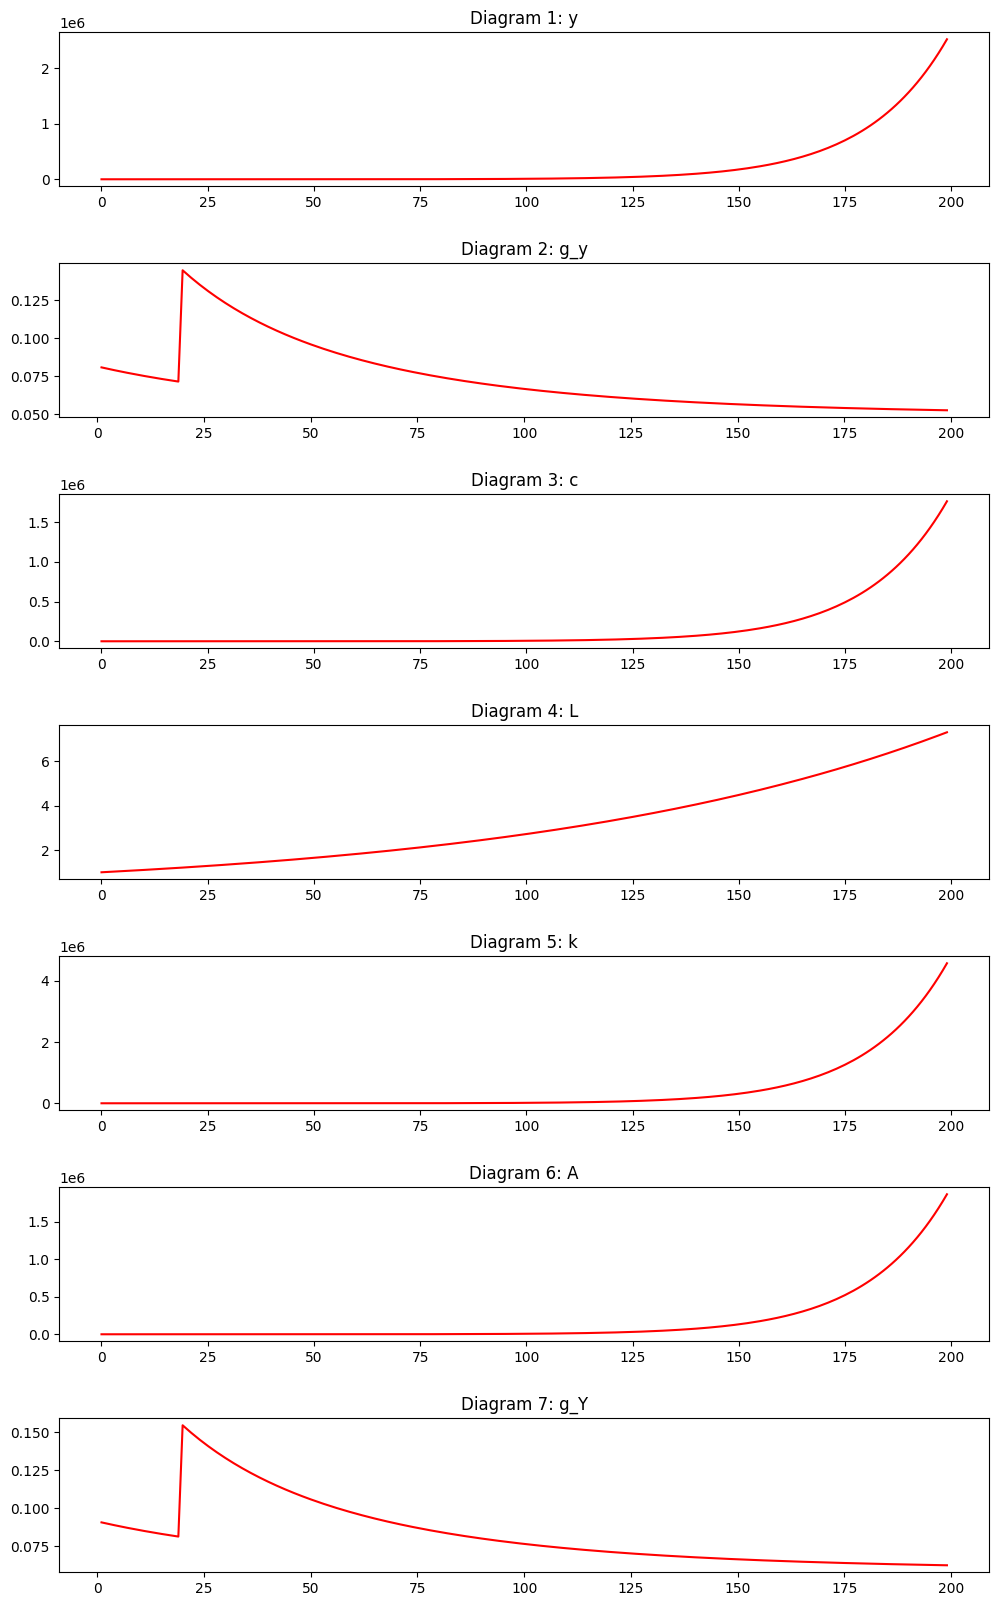

In [11]:
# example with policy change (only works for s (increase_savings=X) and n(increase_population=X))
parameters = {'n': 0.01, 's': 0.2, 'delta': 0.1, 'alpha': 1/3, 'phi': 5/6, 'A': 1, 'L': 1, 'K': 1}
run_simulation(SE, parameters, periods=200, policy_change_period=20, increase_savings=0.1)

Model Parameters:


,n,s,s_R,delta,alpha,phi,rho,lambda_R,A,L,K,Y,L_A,y,k,c,Y_old,y_old,g_Y,g_y
Value,0.04,0.25,0.04,0.1,0.33,0.4,1.0,0.8,592.683811,74.747323,61183.873043,47952.633216,2.989893,641.529771,818.542663,481.147328,43755.533477,608.79444,0.091596,0.052375


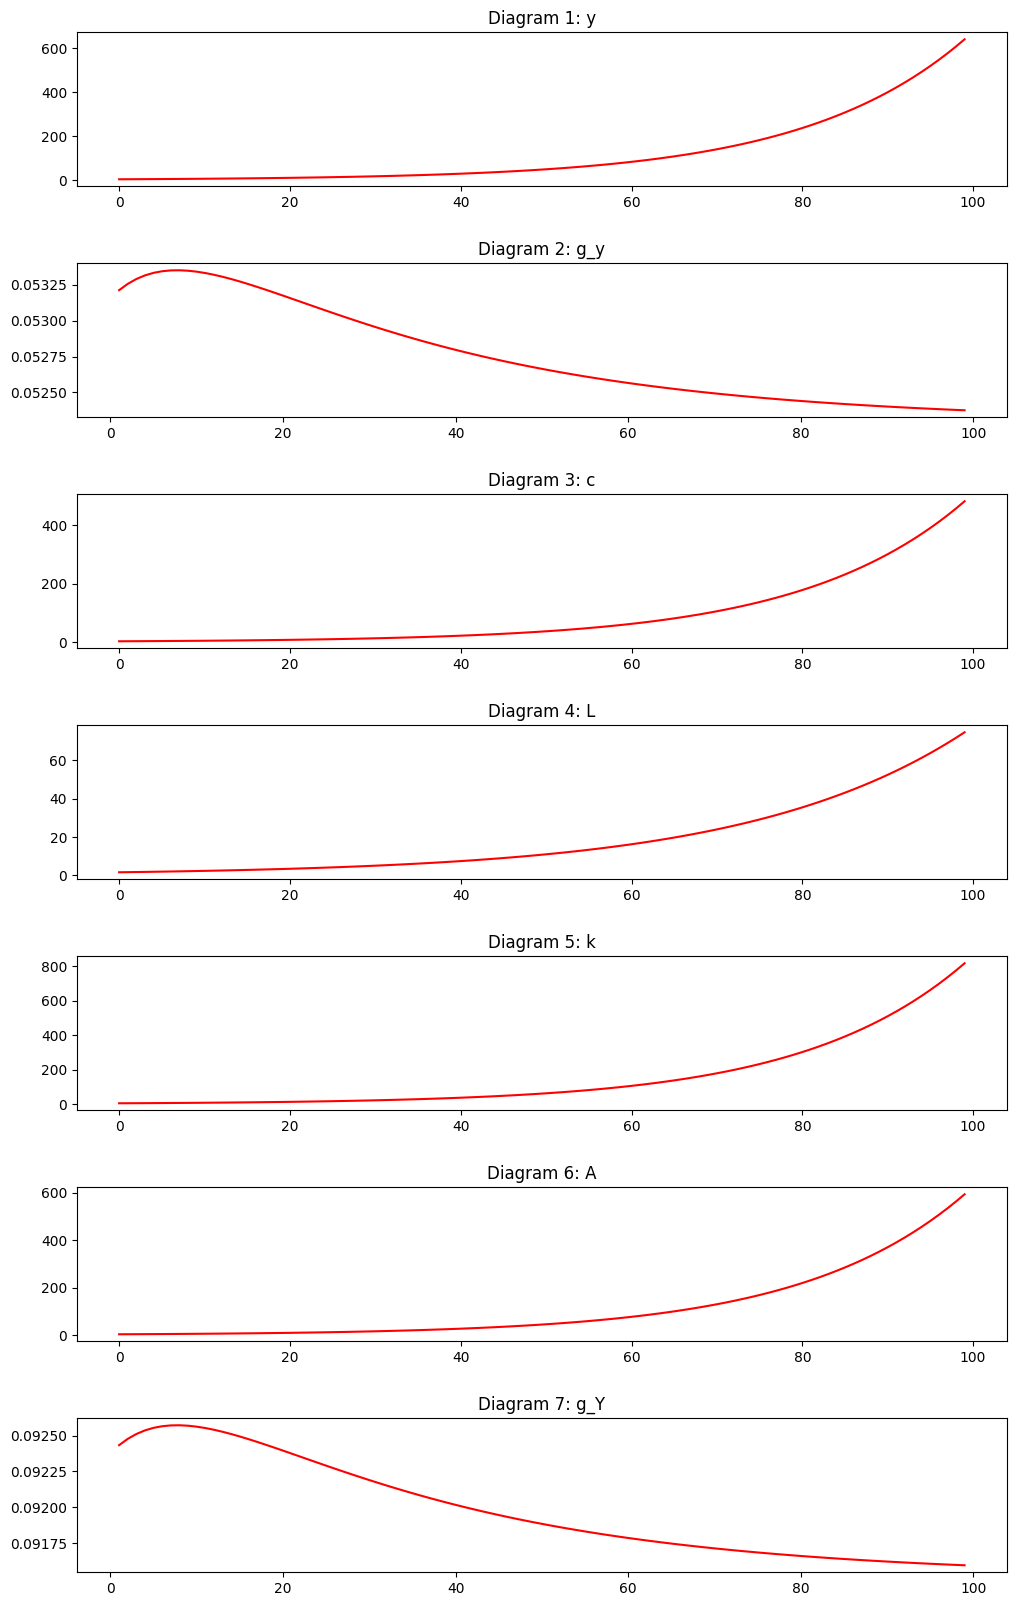

In [12]:
# Assignement 5
parameters = {'alpha': 0.33, 'phi':0.4, 'lambda_R':0.8, 'delta':0.1, 's': 0.25, 's_R':0.04, 'rho':1, 'n':0.04, 'A':3.021, 'L':1.48, 'K':6.179}
run_simulation(RD_S, parameters, periods=100)

Model Parameters:


,n,s,s_R,delta,alpha,phi,rho,lambda_R,A,L,K,Y,L_A,y,k,c,Y_old,y_old,g_Y,g_y
Value,0.01,0.2,0.02,0.06,0.333333,0.5,1.0,1.0,198.873172,14.632036,9237.785838,4219.496678,0.292641,288.373864,631.339755,230.699091,4091.674235,282.434451,0.030762,0.020811


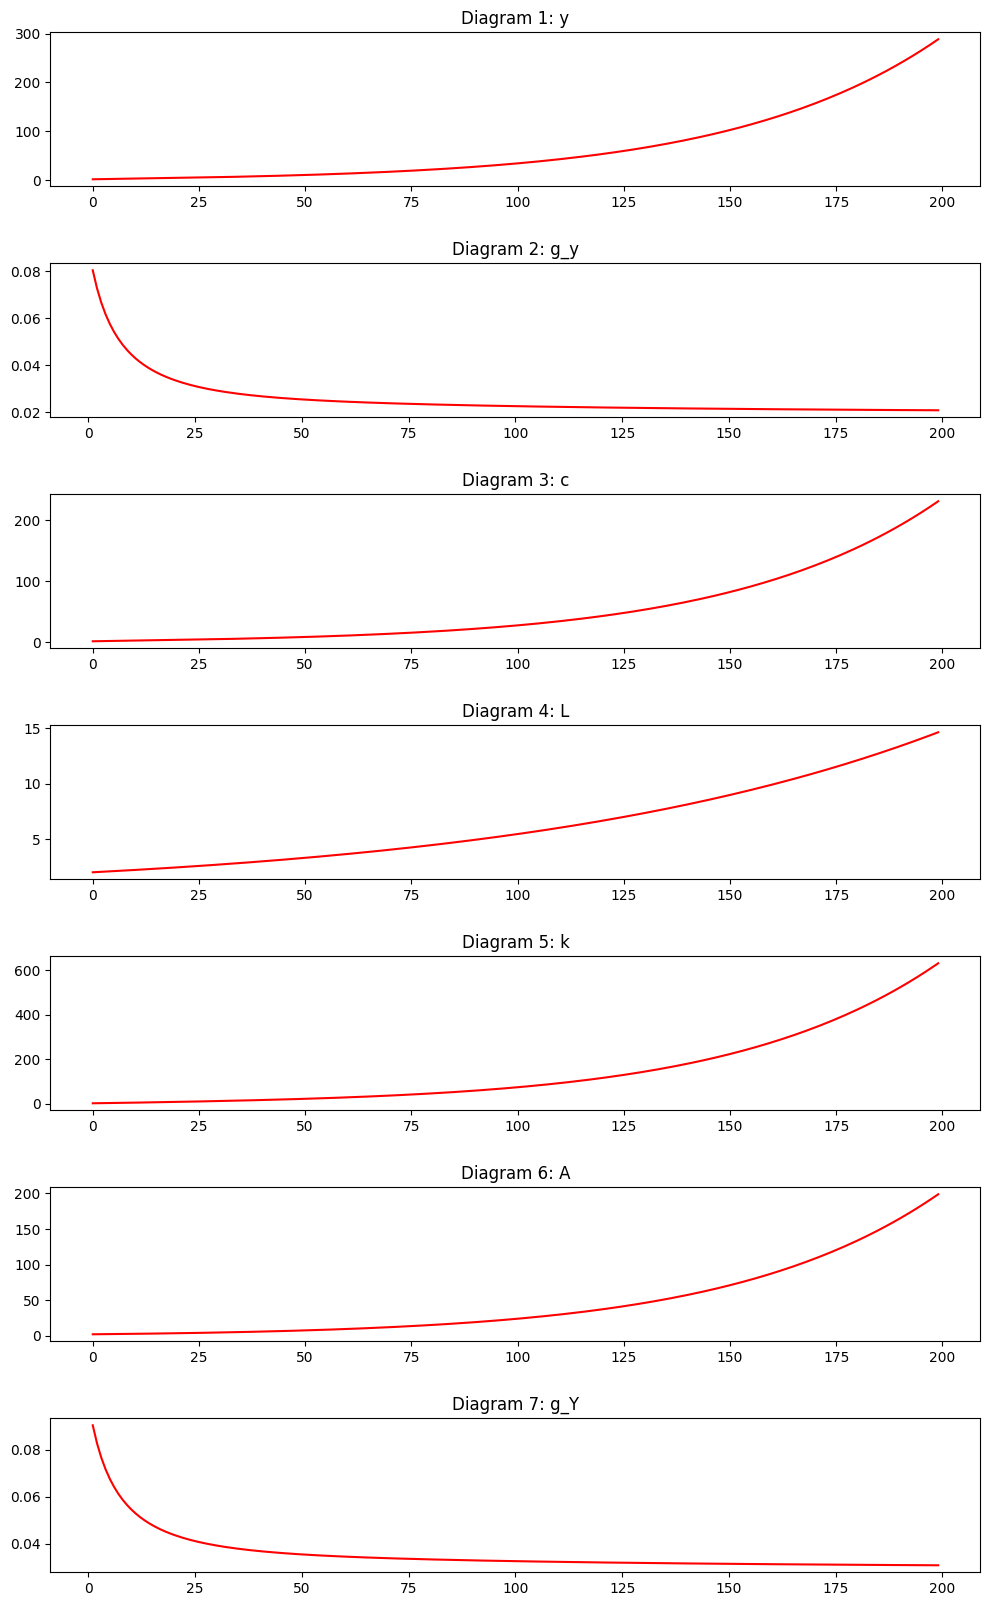

In [13]:
# Hemi-endogenous growth p. 265 book
parameters = {'delta':0.06, 's':0.2, 's_R':0.02, 'n':0.01, 'lambda_R':1, 'phi':0.5, 'rho':1, 'A':2, 'L':2, 'K':2}
run_simulation(RD_S, parameters, periods=200)